In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
sns.set_theme(style="whitegrid")
df = pd.read_csv("/content/entrenamiento.csv")
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [37]:
df.describe()

,id,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,992192.000000,838994.000000,839929.000000,0.0,503045.000000,390699.000000,773021.000000,448164.00000,4.369610e+05,9.478110e+05
mean,500338.438758,-59.266586,-34.793745,NaN,2.858577,2.086094,1.697637,493.51136,5.769533e+02,2.881687e+05
std,288685.497758,2.707383,3.066257,NaN,1.682454,2.705342,1.072722,4101.38179,7.383998e+04,5.560863e+06
min,1.000000,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.00000,-1.700000e+02,0.000000e+00
25%,250259.750000,-58.756011,-34.921709,NaN,2.000000,1.000000,1.000000,50.00000,4.500000e+01,3.900000e+04
50%,500641.500000,-58.444383,-34.610508,NaN,3.000000,2.000000,1.000000,95.00000,7.500000e+01,9.800000e+04
75%,750507.250000,-58.058983,-34.459156,NaN,4.000000,3.000000,2.000000,270.00000,1.550000e+02,2.100000e+05
max,1000000.000000,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.00000,2.700000e+07,3.100000e+09


In [38]:
#Ver qué provincias hay en la columna l2
print(df['l2'].unique())

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Montevideo' 'Mendoza' 'Misiones'
 'Río Negro' 'Tierra Del Fuego' 'Pennsylvania' 'Chubut' 'Corrientes'
 'Salta' 'La Rioja' 'La Pampa' 'Chaco' 'San Juan' 'Rocha' 'Jujuy'
 'Maryland' 'Canelones' 'Santa Catarina' 'Colonia' 'Florida' 'Santa Cruz'
 'Michigan' 'Miami' 'Santiago Del Estero' 'Rio de Janeiro' 'Formosa'
 'Catamarca' 'Rio Grande do Norte' 'São Paulo']


In [39]:
# 1. Filtramos las dos provincias clave
provincias_interes = ['Neuquén', 'Río Negro']

# Usamos .isin() que sirve para filtrar por varios valores a la vez
df_region = df[df['l2'].isin(provincias_interes)].copy()

print(f"Total de datos en la región (Nqn + RN): {df_region.shape[0]}")

Total de datos en la región (Nqn + RN): 16149


In [40]:
# 2. Vemos el top 20 de ciudades con más avisos en estas provincias
print(df_region['l3'].value_counts().head(20))

l3
Neuquén                    2791
San Carlos de Bariloche    2500
Confluencia                2441
General Roca               1474
Lácar                       729
Cipolletti                  696
Villa La Angostura          606
San Martín de los Andes     513
Plottier                    484
Añelo                       265
Centenario                  198
Junin de los Andes          188
Rincón de los Sauces        176
General Fernández Oro       175
El Bolsón                   164
Las Grutas                  108
Cinco Saltos                 49
Viedma                       36
Aluminé                      36
Mari Menuco                  31
Name: count, dtype: int64


In [41]:
# 1. Definimos las ciudades que pertenecen al ecosistema Vaca Muerta
ciudades_vm = [
    'Neuquén', 'Confluencia', 'General Roca', 'Cipolletti',
    'Plottier', 'Añelo', 'Centenario', 'Rincón de los Sauces',
    'General Fernández Oro', 'Cinco Saltos'
]

# 2. Filtramos: Nos quedamos solo con las filas donde 'l3' está en nuestra lista
df_vm = df_region[df_region['l3'].isin(ciudades_vm)].copy()

# 3. Veamos cuántos datos nos quedaron por ciudad para asegurar que funcionó
print(df_vm['l3'].value_counts())

l3
Neuquén                  2791
Confluencia              2441
General Roca             1474
Cipolletti                696
Plottier                  484
Añelo                     265
Centenario                198
Rincón de los Sauces      176
General Fernández Oro     175
Cinco Saltos               49
Name: count, dtype: int64


Confirmamos que había una gran influencia del turismo en las ciudades como Bariloche, por ejemplo.

In [42]:
# 1. Definimos la "whitelist" (Solo ciudades afectadas por Vaca Muerta)
ciudades_vm = [
    'Neuquén',               # Capital (Zona admin/residencial)
    'Confluencia',           # A veces Neuquén capital aparece bajo este nombre de depto
    'General Roca',          # RN - Ciudad dormitorio/servicios
    'Cipolletti',            # RN - Ciudad dormitorio pegada a Neuquén
    'Plottier',              # Ciudad dormitorio expansión de Nqn
    'Añelo',                 # ZONA ZERO (Corazón de Vaca Muerta)
    'Centenario',            # Ruta hacia Añelo
    'Rincón de los Sauces',  # Zona petrolera histórica
    'General Fernández Oro', # RN - Crecimiento residencial reciente
    'Cinco Saltos'           # RN - Logística/Residencial
]

# 2. Filtramos: Nos quedamos solo con las filas que coinciden con nuestra lista
df_vm = df_region[df_region['l3'].isin(ciudades_vm)].copy()

# 3. Verificamos que Bariloche y los turistas se hayan ido
print("--- Ciudades en el dataset final ---")
print(df_vm['l3'].value_counts())
print(f"\nTotal de propiedades para el análisis: {df_vm.shape[0]}")

--- Ciudades en el dataset final ---
l3
Neuquén                  2791
Confluencia              2441
General Roca             1474
Cipolletti                696
Plottier                  484
Añelo                     265
Centenario                198
Rincón de los Sauces      176
General Fernández Oro     175
Cinco Saltos               49
Name: count, dtype: int64

Total de propiedades para el análisis: 8749


En qué moneda vende/alquila la gente en esta zona?

In [43]:
print(df_vm.groupby('operation_type')['currency'].value_counts())

operation_type     currency
Alquiler           ARS         1878
                   USD          106
Alquiler temporal  ARS           69
Venta              USD         3471
                   ARS         1101
Name: count, dtype: int64


Ventas: El mercado manda en Dólares (USD) (3471 avisos). Aunque hay 1101 en pesos, analizarlos juntos es un problemón estadístico por la inflación.

Alquileres: El mercado se mueve en Pesos (ARS) (1878 avisos). Los 106 en dólares son seguramente "Alquileres Corporativos" para petroleros (muy interesantes, pero son pocos).

Decisión sobre la No-Homogeneización de Monedas

Para el presente análisis del impacto de "Vaca Muerta" en el mercado inmobiliario, tomé la decisión deliberada de **no** convertir todas las divisas a una moneda común, sino de segregar el análisis en dos clústeres independientes: **Mercado en Dólares (USD)** y **Mercado en Pesos (ARS)**.

Esta decisión se fundamenta en tres pilares de la economía argentina:

1.  **Dualidad Estructural del Mercado:**
    El mercado inmobiliario argentino opera bajo una lógica bimonetaria. Las operaciones de **Venta** (reserva de valor) se realizan casi exclusivamente en **USD**, mientras que el mercado de **Alquileres** (flujo de caja para vivienda) se ha regido históricamente en **ARS**. Mezclarlos oscurecería los comportamientos específicos de cada segmento.

2.  **Inexistencia de un Tipo de Cambio Único:**
    Dada la brecha cambiaria histórica en Argentina (Dólar Oficial vs. Dólar Blue/MEP), realizar una conversión de moneda sin incorporar una serie de tiempo externa con la cotización diaria del "Dólar Paralelo" para cada fecha de publicación (`start_date`) introduciría un sesgo de error significativo en los valores.

3.  **Distorsión Inflacionaria:**
    Convertir los valores de venta (USD) a pesos (ARS) reflejaría principalmente la devaluación de la moneda local y la inflación acumulada, en lugar de mostrar la variación real del valor de las propiedades ("Efecto Vaca Muerta"). Mantener las ventas en su moneda original (USD) permite observar la apreciación o depreciación real del activo inmobiliario ("Hard Asset").

**Estrategia Adoptada:**
* **Análisis de Ventas:** Se utilizará exclusivamente el subconjunto en **USD**.
* **Análisis de Alquileres:** Se utilizará exclusivamente el subconjunto en **ARS**.

In [44]:
# --- MUNDO VENTAS (Solo Dólares) ---
df_ventas = df_vm[
    (df_vm['operation_type'] == 'Venta') &
    (df_vm['currency'] == 'USD')
].copy()

# --- MUNDO ALQUILERES (Solo Pesos) ---
df_alquiler = df_vm[
    (df_vm['operation_type'] == 'Alquiler') &
    (df_vm['currency'] == 'ARS')
].copy()

print(f"Propiedades listas para analizar VENTA (USD): {df_ventas.shape[0]}")
print(f"Propiedades listas para analizar ALQUILER (ARS): {df_alquiler.shape[0]}")

Propiedades listas para analizar VENTA (USD): 3471
Propiedades listas para analizar ALQUILER (ARS): 1878


Quién es más caro? Ahora que los datos están limpios (moneda única, zona correcta, sin basura), vamos a responder mi primera pregunta de investigación: Añelo (zona petróleo) es más caro que Neuquén Capital?

Vamos a usar un boxplot (Diagrama de caja y bigotes). Es el mejor gráfico para esto porque muestra el precio mediano y los rangos.

Hipótesis: En un mercado normal, vivir en la Capital (Neuquén) debería ser mucho más caro que vivir en un pueblo alejado (Añelo). Si el gráfico muestra que Añelo se acerca, iguala o supera a Neuquén, podemos ver el "Efecto Vaca Muerta": la demanda industrial es tan bestial que rompió la lógica inmobiliaria tradicional. Se paga por cercanía al pozo petrolero lo mismo que por vivir en el centro de la capital.

/tmp/ipython-input-3474178914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


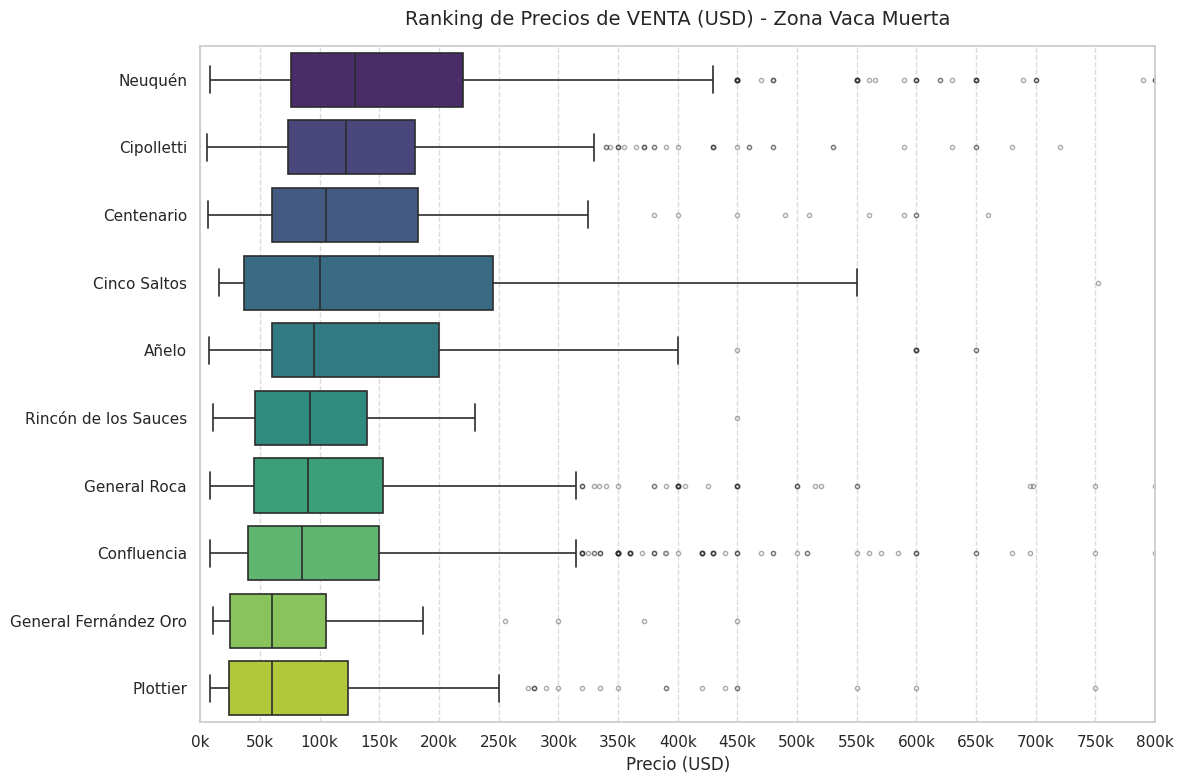

In [45]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid")

# 1. Calculamos el orden: Ciudades más caras arriba
order = df_ventas.groupby('l3')['price'].median().sort_values(ascending=False).index

# 2. Creamos la figura
plt.figure(figsize=(12, 8))

# 3. EL GRÁFICO (Invertimos ejes: X es precio, Y es ciudad)
sns.boxplot(
    data=df_ventas,
    x='price',       # Precio en horizontal
    y='l3',          # Ciudades en vertical
    order=order,
    palette='viridis',
    linewidth=1.2,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.4} # Puntos suaves
)

# 4.
plt.title('Ranking de Precios de VENTA (USD) - Zona Vaca Muerta', fontsize=14, pad=15)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('') # Sacamos la etiqueta 'l3' que es obvia

plt.xlim(0, 800000)

# Formateamos el eje X para que diga "150k", "200k" (más limpio)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k'.format(x/1000)))
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
plt.grid(axis='x', linestyle='--', alpha=0.7) # Rejilla vertical para comparar fácil
plt.tight_layout()
plt.show()

##Conclusiones Preliminares: El "Efecto Vaca Muerta" en los Precios

El análisis de distribución de precios de venta revela distorsiones significativas en el mercado inmobiliario regional, validando parcialmente la hipótesis de impacto industrial sobre la lógica residencial tradicional:

**1. La Anomalía de Añelo (Zona Cero):**
A pesar de ser una localidad con menor infraestructura urbana y servicios comparada con las grandes ciudades dormitorio, **Añelo** presenta una mediana de precios (~U$D 95k) superior a ciudades consolidadas como **General Roca**, **Plottier** y **Fernández Oro**.
El precio no está dictado por la calidad de vida o amenidades urbanas, sino por la **proximidad al yacimiento** y la demanda corporativa/industrial. La caja compacta (poca dispersión) sugiere una oferta estandarizada (probablemente complejos habitacionales para trabajadores).

**2. Neuquén Capital y Cipolletti (Hubs Premium):**
Estas dos ciudades lideran el ranking con las medianas más altas y, notablemente, con los "bigotes" (rangos) más extensos hacia la derecha.
Concentran el segmento ABC1 y gerencial de la industria. A diferencia de Añelo, aquí conviven departamentos estándar con propiedades de lujo (outliers que superan los U$D 400k), reflejando una desigualdad inmobiliaria mayor.

**3. Plottier como Oportunidad (Zona Dormitorio):**
Resulta notable que Plottier, siendo una extensión natural de la capital, muestre la mediana más baja del grupo principal (~U$D 60k). Esto podría indicar un mercado subvaluado o una oferta saturada de loteos/casas más sencillas, funcionando como la alternativa económica para quienes trabajan en la capital pero no pueden costearla.

**Conclusión:**
El "Efecto Vaca Muerta" se manifiesta elevando el piso de precios en la zona de extracción (Añelo) a niveles que compiten con las zonas residenciales premium, rompiendo la relación tradicional costo/infraestructura.

El comportamiento divergente observado en el periodo 2019-2020, donde las localidades petroleras (Añelo, Rincón de los Sauces) mostraron una apreciación de valor a contramano de la caída generalizada en las plazas consolidadas (Neuquén, Cipolletti), sugiere un desacople del mercado industrial respecto a la macroeconomía nacional.

Dado que el conjunto de datos representa una "foto" de este momento de alta actividad, el análisis final se centra en cuantificar la **estructura de precios relativos**. Buscamos medir la "Prima Vaca Muerta":

1.  **La Brecha Industrial:** Cuál es el porcentaje exacto de sobreprecio que paga la industria en Añelo comparado con una ciudad dormitorio estándar (Plottier)?
2.  **La Convergencia con la Capital:** Qué tan cerca llegó a estar el valor en el desierto respecto a la zona más exclusiva de la Patagonia (Neuquén Capital) en este pico de actividad?

A continuación, se calcula el **"Índice de Sobreprecio"** para dimensionar el impacto económico directo.

In [51]:
# 1. Obtenemos las medianas exactas del periodo
medianas = df_ventas.groupby('l3')['price'].median()

# Usamos .get() para evitar errores si alguna ciudad falta
precio_anelo = medianas.get('Añelo', 0)
precio_plottier = medianas.get('Plottier', 0)
precio_neuquen = medianas.get('Neuquén', 0)
precio_roca = medianas.get('General Roca', 0)

# 2. Calculamos los porcentajes de diferencia
# Fórmula: ((Precio A - Precio B) / Precio B) * 100

if precio_plottier > 0:
    brecha_plottier = ((precio_anelo - precio_plottier) / precio_plottier) * 100
else:
    brecha_plottier = 0

if precio_roca > 0:
    brecha_roca = ((precio_anelo - precio_roca) / precio_roca) * 100
else:
    brecha_roca = 0

if precio_neuquen > 0:
    cercania_capital = (precio_anelo / precio_neuquen) * 100
else:
    cercania_capital = 0

print(f"--- RADIOGRAFÍA DE PRECIOS (Snapshot 2019-2020) ---")
print(f"💰 Precio Mediano Añelo:    U$D {precio_anelo:,.0f}")
print(f"🏡 Precio Mediano Plottier: U$D {precio_plottier:,.0f}")
print(f"🏢 Precio Mediano Neuquén:  U$D {precio_neuquen:,.0f}")
print("-" * 40)
print(f"📊 CONCLUSIÓN MATEMÁTICA:")
print(f"1. EFECTO ZONA INDUSTRIAL: Una propiedad en Añelo cuesta un {brecha_plottier:.1f}% MÁS que en Plottier.")
print(f"2. EFECTO DISTANCIA: Añelo cuesta un {brecha_roca:.1f}% más que General Roca.")
print(f"3. CONVERGENCIA: El valor en Añelo representa el {cercania_capital:.1f}% del valor de una propiedad en la Capital.")

--- RADIOGRAFÍA DE PRECIOS (Snapshot 2019-2020) ---
💰 Precio Mediano Añelo:    U$D 95,536
🏡 Precio Mediano Plottier: U$D 60,000
🏢 Precio Mediano Neuquén:  U$D 130,000
----------------------------------------
📊 CONCLUSIÓN MATEMÁTICA:
1. EFECTO ZONA INDUSTRIAL: Una propiedad en Añelo cuesta un 59.2% MÁS que en Plottier.
2. EFECTO DISTANCIA: Añelo cuesta un 6.2% más que General Roca.
3. CONVERGENCIA: El valor en Añelo representa el 73.5% del valor de una propiedad en la Capital.


El análisis exploratorio de datos, centrado en el periodo de actividad 2019-2020, permite confirmar la hipótesis de que la industria hidrocarburífera distorsiona la lógica tradicional del mercado inmobiliario en la cuenca neuquina.

1. Hallazgos Estructurales (Análisis de Distribución):

**La Anomalía de Añelo:** A pesar de su ubicación remota y menor desarrollo urbano, Añelo exhibe una mediana de precios (~U$D 95k) que supera significativamente a ciudades dormitorio consolidadas como Plottier y General Roca. La baja dispersión de sus precios (caja compacta en el gráfico) sugiere una oferta homogeneizada, orientada a la funcionalidad laboral más que al mercado residencial diverso.

**Neuquén Capital como Hub Premium:** La capital mantiene la mediana más alta, pero se distingue por su larga cola de precios hacia la derecha (outliers > U$D 400k). Esto evidencia la presencia del segmento ABC1 y un mercado de lujo que no existe en la zona de extracción.

2. Limitación Temporal y Enfoque **Transversal:** El análisis temporal revela un comportamiento divergente en 2019-2020: mientras las plazas residenciales (Neuquén, Cipolletti) ajustaban precios a la baja debido a la crisis macroeconómica nacional, las plazas petroleras (Añelo, Rincón de los Sauces) mostraron resistencia o alza. Nota **Metodológica:** Dado que el dataset constituye una "foto" (snapshot) de este periodo, se procedió a cuantificar la distorsión mediante un análisis de precios relativos en lugar de una serie de tiempo extendida.

3. Cuantificación del "Efecto Vaca Muerta" (Índices): Los datos arrojan las siguientes disparidades de mercado para el periodo analizado:

**Prima por Localización Industrial:** Vivir o invertir en Añelo cuesta un 59.2% más que en Plottier. El mercado paga este sobreprecio por la eficiencia logística (cercanía al pozo), "desacoplándose" de las variables de confort urbano.

**Convergencia con la Capital:** La presión de demanda es tal que el valor de una propiedad en el desierto de Vaca Muerta alcanzó el 73.5% del valor de una propiedad en la capital provincial.

El mercado inmobiliario de la región no es homogéneo. Coexisten dos lógicas de valoración: una basada en la amenidad urbana (Neuquén/Cipolletti) y otra basada estrictamente en la rentabilidad logística y escasez de oferta (Añelo), siendo esta última la responsable de la anomalía de precios detectada.